# Setup

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from darwinian_shift import DarwinianShift, GlobalKmerSpectrum, CDFPermutationTest, ChiSquareTest, EvenMutationalSpectrum
from darwinian_shift.lookup_classes import DummyValuesRandom
from darwinian_shift import hide_top_and_right_axes

In [3]:
# Load data
data = pd.read_excel("aau3879_TableS2.xlsx", skiprows=17, sheet_name='Mutations_collapsed_by_distance')

In [4]:
# Colours

unobserved_colour = '#636363'
observed_colour = '#EE7733'

foldx_expected_colour = '#EE6677'
foldx_observed_colour = '#CC3311'

interface_expected_colour = '#88CCEE'
interface_observed_colour = '#0077BB'

calcium_expected_colour = '#8DE0D7'
calcium_observed_colour = '#009988'

In [5]:
# This calculates the mutational spectrum, sets up the statistical tests to use, and filters the data. 
d = DarwinianShift(
    data=data, 
    source_genome='grch37',
    # Define the spectrum to use
    spectra=[GlobalKmerSpectrum(
        k=3,  # Use a trinucleotide context,
        ignore_strand=False,  # Reading strand of the protein matters, so have 192 different mutation types
        deduplicate_spectrum=False,  # Do not remove duplicate mutations when calculating the spectrum
        name=''  # Use a blank name, so in the plots it will just say "Expected"
    )]
)

In [6]:
plot_directory = "./whole_notch_figures/"
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Missense mutations sliding window

In [7]:
notch1_missense = d.make_section({'transcript_id': 'ENST00000277541', 'included_mutation_types': 'missense'})

In [8]:
notch1_missense.load_section_mutations()

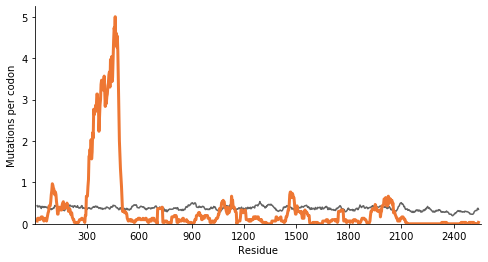

In [9]:
notch1_missense.plot_sliding_window(show_legend=False, colours=[observed_colour, unobserved_colour], 
                                   figsize=(8, 4), window_size=30, window_step=3)
hide_top_and_right_axes()
plt.savefig(os.path.join(plot_directory, 'notch1_missense_sliding_window.pdf'), transparent=True)

# Testing synonymous mutation enrichment in EGF11-12

In [10]:
from darwinian_shift import SequenceDistanceLookup

In [11]:
section_definition_egf11_12 = {
    'transcript_id': 'ENST00000277541', 
    'included_mutation_types': 'synonymous',
    'target_selection': np.arange(412, 488)
}

In [12]:
s = SequenceDistanceLookup(boolean=True)

In [13]:
d.change_lookup(s, inplace=True)

In [14]:
d.statistics = [CDFPermutationTest(num_permutations=100000, testing_random_seed=0), 
                ChiSquareTest(bins=[-1, 0.5, 1.5])]

In [15]:
notch1_synonymous = d.run_section(section_definition_egf11_12)

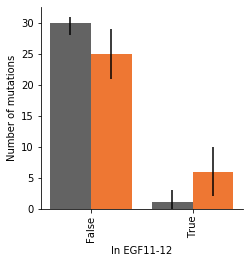

In [16]:
notch1_synonymous.plot_binned_counts(figsize=(4, 4), colours=[observed_colour, unobserved_colour], 
                                          show_legend=False)
hide_top_and_right_axes()
plt.title('')
plt.xticks(plt.gca().get_xticks(), ['False', 'True'])
plt.xlabel('In EGF11-12')
plt.subplots_adjust(left=0.3, bottom=0.3, right=1, top=1)
plt.savefig(os.path.join(plot_directory, 'notch1_synonymous_egf_bar_plot.pdf'), transparent=True)

In [17]:
notch1_synonymous.get_results_dictionary()['CDF_perm__pvalue']

0.0011999880001199988

In [18]:
notch1_synonymous.get_results_dictionary()['num_mutations']

31